In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df1 = pd.read_feather("../results/test1.feather")
df1["auto_scale"] = True
df2 = pd.read_feather("../results/test2.feather")
df2["auto_scale"] = False

df = pd.concat([df1, df2], ignore_index=True)

/Users/david/Library/Caches/pypoetry/virtualenvs/fast-qaoa-TFZnPat--py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/david/Library/Caches/pypoetry/virtualenvs/fast-qaoa-TFZnPat--py3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


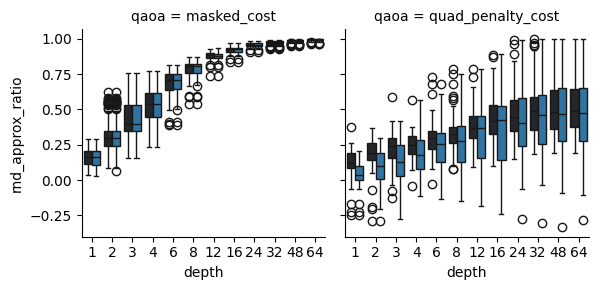

In [79]:
fg = sns.FacetGrid(df.query("n_qubits == 12"), col="qaoa")
fg.map_dataframe(sns.boxplot, x="depth", y="rnd_approx_ratio", hue="auto_scale", hue_order=[True, False], legend=True)
# sns.boxplot(df1.query("n_qubits == 12"), x="depth", y="rnd_approx_ratio", hue="qaoa")

In [126]:
import numpy as np
def f(x):
    betas = x.betas
    gammas = x.gammas
    qaoa = [x.qaoa] * len(betas)
    dist = np.linspace(0, 1, len(betas))
    depth = [len(betas)] * len(betas)
    n_qubits = [x.n_qubits] * len(betas)

    df = pd.DataFrame(zip(betas, gammas, qaoa, dist, depth, n_qubits), columns=["beta", "gamma", "qaoa", "dist", "depth", "n_qubits"])
    return df


dfx = pd.concat(list(df3.apply(f, axis=1)), ignore_index=True)

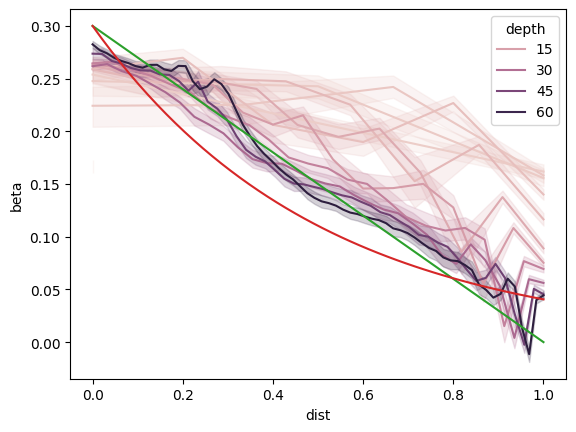

In [127]:
sns.lineplot(dfx.query("n_qubits == 12 and qaoa == 'masked_cost'"), x="dist", y="beta", hue="depth")
x = np.linspace(0, 1)
plt.plot(x, 0.3 - 0.3 * x)
plt.plot(x, 0.3 * np.exp(-2 * x) )

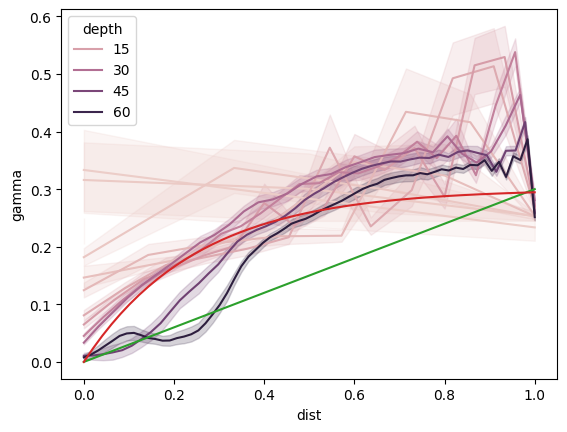

In [128]:
sns.lineplot(dfx.query("n_qubits == 12 and qaoa == 'masked_cost'"), x="dist", y="gamma", hue="depth")
x = np.linspace(0, 1)
plt.plot(x,  0.3 * x)
plt.plot(x, 0.3 - 0.3 * np.exp(-4 * x) )

In [104]:
from fastqaoa.params import init_linear

In [106]:
init_linear(64) * 0.3

TypeError: can't multiply sequence by non-int of type 'float'

In [121]:
df3 = pd.read_feather("../results/test3.feather")
df3["method"] = "lin"
df1["method"] = "int"

<Axes: xlabel='depth', ylabel='rnd_approx_ratio'>

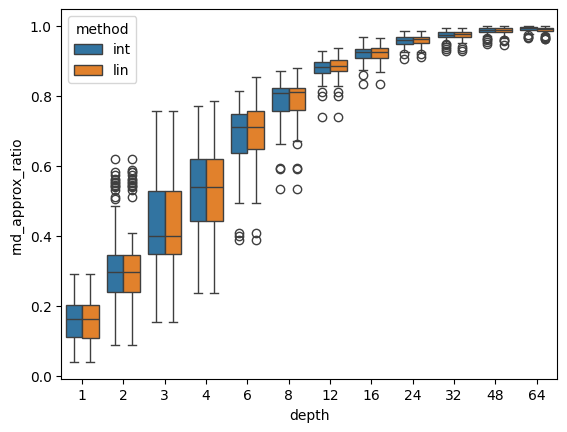

In [133]:
dfz = pd.concat([df1.query("qaoa == 'masked_cost'"), df3])

sns.boxplot(dfz.query("n_qubits == 12"), x="depth", y="rnd_approx_ratio", hue="method")